## XGBoost

In [25]:
#Importing all of the packages that we are going to need to Boost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [26]:
# Importing our data set
df = pd.read_csv('csv_files/p1_comp2_final.csv', index_col=0)

In [27]:
# Looking at the shape of our dataset
df.shape

(29999, 36)

In [28]:
# Looking to make sure no nulls and that all columns are numerical 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 1 to 29999
Data columns (total 36 columns):
X1                  29999 non-null float64
X2                  29999 non-null int64
X3                  29999 non-null int64
X4                  29999 non-null int64
X5_Age_Bins         29999 non-null int64
X6_Payment_Bins     29999 non-null int64
X7_Payment_Bins     29999 non-null int64
X8_Payment_Bins     29999 non-null int64
X9_Payment_Bins     29999 non-null int64
X10_Payment_Bins    29999 non-null int64
X11_Payment_Bins    29999 non-null int64
X12_abs             29999 non-null float64
X12_sign            29999 non-null int64
X12_monthlydif      29999 non-null int64
X13_abs             29999 non-null float64
X13_sign            29999 non-null int64
X13_monthlydif      29999 non-null int64
X14_abs             29999 non-null float64
X14_sign            29999 non-null int64
X14_monthlydif      29999 non-null int64
X15_abs             29999 non-null float64
X15_sign            

In [29]:
# Splitting our data set into X (variable) and Y (target)
X, Y = df.iloc[:,:-1],df.iloc[:,-1]

In [30]:
# Creating the DMatrix which is used with XGBoost
df_dmatrix = xgb.DMatrix(data=X,label=Y)

In [31]:
# Going to split our data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2019)

In [32]:
# Going to create our XGBoost model. We are using Classifier since trying to predict 
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.2, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fitting our model
xg_reg.fit(X_train,Y_train)

# Making predictions on our model
preds = xg_reg.predict(X_test)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
# Printing out the 'RMSE' in order to see how accurate we were
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.454973


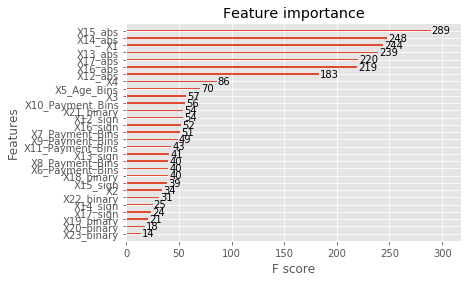

In [24]:
# Plotting the feature importance of each variable 
xgb.plot_importance(xg_reg)
plt.show()

In [11]:
# Going to use k-fold in order to cross validate the model
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=df_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

[22:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[22:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[22:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[22:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[22:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[22:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[22:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[22:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[22:28:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_

In [12]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.484002,0.000099,0.484047,0.000075
1,0.470604,0.000463,0.470703,0.000265
2,0.459086,0.000945,0.459288,0.000683
3,0.449067,0.001242,0.449335,0.001234
4,0.441037,0.001327,0.441357,0.001497


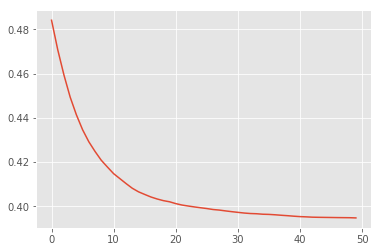

In [13]:
# Visualizing the change in the rmse as more and more trees are built
cv_results['test-rmse-mean'].plot()

This clearly shows are more trees are build the model learns and constantly produces a lower RMSE. By the time we get to our specificed number of trees in the model, **50** we have a very low RMSE.

In [14]:
# Printing out our last boosting round. Going to compare to our 
## originally calculated RMSE
print((cv_results["test-rmse-mean"]).tail(1))

49    0.394812
Name: test-rmse-mean, dtype: float64


 Through k-fold we got an RMSE that was actually worse than our original one; however the two results were very similar.